# Softmax regression implemented in Python

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## Softmax regression algorithm

In [2]:
class SoftmaxRegressor:
    
    def __init__(self):
        pass
    
    
    def train(self, X, y, nClass, niter, rate):
        self.n_samples, n_features = X.shape
        self.nClass = nClass
        
        # Step 0: Initialization
        self.weight = np.random.rand(self.nClass, n_features)
        self.bias = np.zeros((1, self.nClass))
        losses = []
        
        for i in range(niter):
            
            # Step 1: Compute the score
            score = self.compute_score(X)
            
            # Step 2: Softmax activation
            prob = self.softmax(score)
            
            # One-hot encoding
            y_predict = np.argmax(prob, axis = 1)[:, np.newaxis]
            y_one_hot = self.one_hot(y)
            
            # Step 3: Compute the loss
            loss = self.cross_entropy(y_one_hot, prob)
            losses.append(loss)
            
            # Step 4: Compute the gradient
            dW = (1 / self.n_samples) * np.dot(X.T, (prob - y_one_hot))
            db = (1 / self.n_samples) * np.sum(prob - y_one_hot, axis = 0)
            
            # Step 5: Update the weight and bias
            self.weight = self.weight - rate * dW.T
            self.bias = self.bias - rate * db
            
            if i % 100 == 0:
                print(f'Iteration number: {i}, loss: {np.round(loss, 4)}')
            
        return self.weight, self.bias, losses
    
    
    def predict(self, X):
        score = self.compute_score(X)
        prob = self.softmax(score)
        return np.argmax(prob, axis = 1)[:, np.newaxis]
    
    
    def softmax(self, score):
        score_exp = np.exp(score)
        sum_exp = np.sum(np.exp(score), axis = 1, keepdims = True)
        softmax = score_exp / sum_exp
        return softmax
    
    
    def compute_score(self, X):
        score = np.dot(X, self.weight.T) + self.bias
        return score
    
    
    def cross_entropy(self, y, prob):
        loss = - (1 / self.n_samples) * np.sum(y * np.log(prob))
        return loss
    
    
    def one_hot(self, y):
        one_hot = np.zeros((self.n_samples, self.nClass))
        one_hot[np.arange(self.n_samples), y.T] = 1
        return one_hot


## Dataset

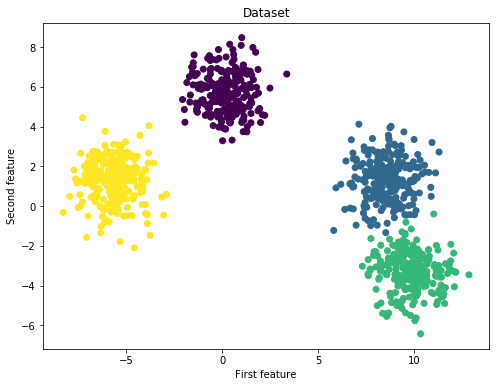

In [3]:
X, y = make_blobs(centers = 4, n_samples = 1000)

fig = plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [4]:
y = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (750, 2)
Shape of y_train: (750, 1)
Shape of X_test: (250, 2)
Shape of y_test: (250, 1)


## Training and testing

Iteration number: 0, loss: 2.0841
Iteration number: 100, loss: 0.8623
Iteration number: 200, loss: 0.5701
Iteration number: 300, loss: 0.4536
Iteration number: 400, loss: 0.389
Iteration number: 500, loss: 0.3465
Iteration number: 600, loss: 0.3155
Iteration number: 700, loss: 0.2915
Iteration number: 800, loss: 0.2721
Iteration number: 900, loss: 0.2559
Iteration number: 1000, loss: 0.242
Iteration number: 1100, loss: 0.23
Iteration number: 1200, loss: 0.2195
Iteration number: 1300, loss: 0.2101
Iteration number: 1400, loss: 0.2017
Iteration number: 1500, loss: 0.1941
Iteration number: 1600, loss: 0.1872
Iteration number: 1700, loss: 0.1808
Iteration number: 1800, loss: 0.175
Iteration number: 1900, loss: 0.1696


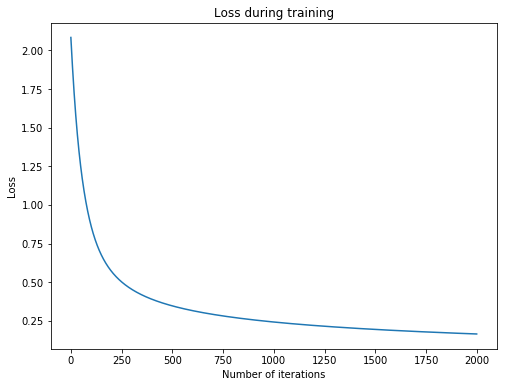

In [5]:
regressor = SoftmaxRegressor()

w_trained, b_trained, loss = regressor.train(X_train, y_train, nClass = 4, niter = 2000, rate = 0.001)

fig = plt.figure(figsize = (8, 6))
plt.plot(np.arange(2000), loss)
plt.title("Loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [6]:
n_test_samples = X_test.shape[0]

y_predict = regressor.predict(X_test)

print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples)*100}%")

Classification accuracy on test set: 98.0%
